# Deep Learning with TensorFlow Module 1

[Based on this CognitiveClass Course](https://cognitiveclass.ai/courses/deep-learning-tensorflow/)

## Labs

The Labs can be found in the `labs/deep-learning-with-tensorflow` directory and are released under MIT

## Introduction to TensorFlow

### What is TensorFlow

Open source library backed by C/C++ and uses a data flow graph base

Tensorflow provides a Python and C++ API as well as CPU/GPU/and Distributed Processing

### Data Flow Graphs

DFGs are made of **nodes** which are mathematical operations and **edges** which are tensors that flow between the operations, this allows us to visualize our graphs

Tensors are simply multi-dimensional arrays which can allow us to represent complex data structures

The different elements of the dataflow can be more easily seen in the Lab for the first section

## Hello World

TensorFlow carries out operations in the form of steps in a graph, an example procedure can be seen in the section 1 labs

### Lab - Hello World

First, we need to install and import TensorFlow - Note I am using version 1.8.0 as this is what the labs use for the MNIST section

In [1]:
# !pip install tensorflow==1.8.0

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.8.0'

#### Build a Graph

Since TF uses a graph computation model, we need to create a graph object to work with

In [4]:
graph1 = tf.Graph()

#### Set Some Values

Once we have a graph we can define some tensor objects and add them to the `graph1` object

We can add 2 constants to the graph by calling `tf.constant()`, this will add a single `tf.Operation` to the graph and returns a `tf.Tensor` object

In [5]:
with graph1.as_default():
    a = tf.constant([2], name='constant_a')
    b = tf.constant([3], name='constant_b')

In [6]:
print('a = ', a, '\nb = ', b)

a =  Tensor("constant_a:0", shape=(1,), dtype=int32) 
b =  Tensor("constant_b:0", shape=(1,), dtype=int32)


We can see that the tensor only shows its name and type and not it's actual value. The value is evaluated when we run a TF session

In [7]:
sess = tf.Session(graph=graph1)
result = sess.run(a)
print(result)
sess.close()

[2]


#### Define an Operation

Next we can add the two tensors in one of two ways, either using the `+` operator as `c = a + b` or with `tf.add()`

In [8]:
with graph1.as_default():
    c =  tf.add(a, b)

In [9]:
sess = tf.Session(graph=graph1)
result = sess.run(c)
print(result)
sess.close()

[5]


#### Manage Session

We can avoid having to close the session by using a `with` block

In [10]:
with tf.Session(graph=graph1) as sess:
    result = sess.run(c)
    print(result)

[5]


#### What's a Tensor?

Tensors are simply mathematical arrays, these can be seen to be as follows

| Dimension | Physical Representation | Mathematical Object | Code | 
| --- | --- | --- | --- | 
| Zero | Point | Scalar | \[1\] |
| One | Line | Vector | \[1,2,3,4\] |
| Two | Surface | Matrix | \[\[1,2,3,4\],\[1,2,3,4\]\] |
| Three | Volume | Tensor | \[\[\[1,2\],\[1,2\]\]\, \[\[1,2\],\[1,2\]\]] |

#### Make some Tensors

We can define these using TF as follows

In [11]:
graph2 = tf.Graph()

with graph2.as_default():
    scalar = tf.constant(1)
    vector = tf.constant([1,2,3])
    matrix = tf.constant([[1,2,3],[1,2,3]])
    tensor = tf.constant([[[1,2,3],[1,2,3]], [[1,2,3],[1,2,3]]])

with tf.Session(graph=graph2) as sess:
    print('Scalar: \n', sess.run(scalar))
    print('\nVector: \n', sess.run(vector))    
    print('\nMatrix: \n', sess.run(matrix))    
    print('\nTensor: \n', sess.run(tensor))

Scalar: 
 1

Vector: 
 [1 2 3]

Matrix: 
 [[1 2 3]
 [1 2 3]]

Tensor: 
 [[[1 2 3]
  [1 2 3]]

 [[1 2 3]
  [1 2 3]]]


In [12]:
print(scalar.shape, vector.shape, matrix.shape, tensor.shape)

() (3,) (2, 3) (2, 2, 3)


#### Variables

Variables are used to share and persist stats that the program manipulates, when we define a variable TF adds a `tf.Operation` to our graph, this can store a writable variable that persists between sessions

We can define a variable with `tf.Variable()` and then running `tf.global_variables.initializer()`

In [13]:
v = tf.Variable(0)

We can change the variable's value with `tf.assign()`

In [14]:
update = tf.assign(v, v+1)

In [15]:
init_op = tf.global_variables_initializer()

In [16]:
with tf.Session()  as sess:
    sess.run(init_op)
    print(sess.run(v))
    for _ in range(3):
        sess.run(update)
        print(sess.run(v))

0
1
2
3


#### Placeholders

Placeholders can be seen as holes in the model into which we will pass data in from outside the graph. These can be defined with `tf.placeholder()`

|Data type	|Python type|Description|
| --------- | --------- | --------- |
|DT_FLOAT	|tf.float32	|32 bits floating point.|
|DT_DOUBLE	|tf.float64	|64 bits floating point.|
|DT_INT8	|tf.int8	|8 bits signed integer.|
|DT_INT16	|tf.int16	|16 bits signed integer.|
|DT_INT32	|tf.int32	|32 bits signed integer.|
|DT_INT64	|tf.int64	|64 bits signed integer.|
|DT_UINT8	|tf.uint8	|8 bits unsigned integer.|
|DT_STRING	|tf.string	|Variable length byte arrays. Each element of a Tensor is a byte array.|
|DT_BOOL	|tf.bool	|Boolean.|
|DT_COMPLEX64	|tf.complex64	|Complex number made of two 32 bits floating points: real and imaginary parts.|
|DT_COMPLEX128	|tf.complex128	|Complex number made of two 64 bits floating points: real and imaginary parts.|
|DT_QINT8	|tf.qint8	|8 bits signed integer used in quantized Ops.|
|DT_QINT32	|tf.qint32	|32 bits signed integer used in quantized Ops.|
|DT_QUINT8	|tf.quint8	|8 bits unsigned integer used in quantized Ops.|

We can define a simple placeholder and operation as follows

In [17]:
a = tf.placeholder(tf.float32)
b = a * 2

#### Pass in the Value

We can pass the actual value for the variable with the `feed_dict` parameter of `sess.run()`

In [18]:
with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:3.5})
    print(result)

7.0


In [19]:
dictionary = {a: [[[1,2,3],[4,5,6],[7,8,9],[10,11,12]] , 
                  [[13,14,15],[16,17,18],[19,20,21],[22,23,24]]]}

with tf.Session() as sess:
    result = sess.run(b,feed_dict=dictionary)
    print (result)

[[[  2.   4.   6.]
  [  8.  10.  12.]
  [ 14.  16.  18.]
  [ 20.  22.  24.]]

 [[ 26.  28.  30.]
  [ 32.  34.  36.]
  [ 38.  40.  42.]
  [ 44.  46.  48.]]]


 #### Operations
 
 Operations are nodes in the graph that represent mathematical operations over tensors, these can be any kind of functions such as `tf.constant()`, `tf.matmul()`, `tf.add()`, `tf.nn.sigmoid`, [among others](https://www.tensorflow.org/api_docs/python)

In [20]:
graph5 = tf.Graph()

with graph5.as_default():
    a = tf.constant([5])
    b = tf.constant([2])
    c = tf.subtract(a, b)
    
with tf.Session(graph=graph5) as sess:
    print(sess.run(c))

[3]


### Lab - Linear Regression

A simple linear model will be approcimated using the TF library

A linear model can be represented by the following equation:

$$
y=ax+b
$$

#### Import Libraries

Before we can start, we need to import some libraries

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

#### Get the Data

The dataset will be the [**Fuel Consumption**](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) dataset which consists of the following fields

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [22]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-02-07 11:13:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2019-02-07 11:13:39 (475 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [23]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Target and Predictor Training Data

Next we can define our $x$ and $y$ variables for training based on the dataframe columns for *Engine Size* and *CO2 Emissions* respectively

In [24]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

#### Initialize and Define the Operations

We can initialize `a` and `b` with any random value and then define the relationship

In [25]:
a = tf.Variable(20.0)
b = tf.Variable(30.0)
y = a * train_x + b

#### Define the Losss

Next we need to define a loss function which is essentially the error function. Our model will then work to minimize this. We will use the **MSE** to define the loss (aka error)

In [26]:
loss = tf.reduce_mean(tf.square(y - train_y))

#### Optimization

Now we need to define an optimization function, in this case *Gradient Descent* which takes in a learning rate as a parameter. A high learning rate will converge faster, however it can also lead to model instability. Using a slow learning rate can reduce convergence rate but will be more likely to converge, however this may only converge to a local min instead of the global one

In [27]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

#### Training

To trian we need to define a training method, in this case minimizing the loss

In [28]:
train = optimizer.minimize(loss)

#### Initialize Variables and Run Session

Lastly, we can initialize the variables and run the training session as follows

In [29]:
init = tf.global_variables_initializer()

In [30]:
loss_values = []
train_data = []

with tf.Session() as sess:
    sess.run(init)
    for step in range(100):
        _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
        loss_values.append(loss_val)
        if step % 5 == 0:
            print(step, loss_val, a_val, b_val)
            train_data.append([a_val, b_val])

0 27056.3 77.138 45.9303
5 1895.91 58.8885 47.4235
10 1766.35 57.6921 52.8596
15 1656.73 56.4048 57.8747
20 1561.76 55.2084 62.5432
25 1479.49 54.0949 66.8884
30 1408.22 53.0585 70.9328
35 1346.47 52.0938 74.6972
40 1292.98 51.1959 78.2009
45 1246.64 50.3602 81.4621
50 1206.5 49.5824 84.4975
55 1171.72 48.8584 87.3227
60 1141.58 48.1845 89.9523
65 1115.48 47.5573 92.3999
70 1092.87 46.9735 94.678
75 1073.28 46.4301 96.7984
80 1056.31 45.9244 98.772
85 1041.6 45.4536 100.609
90 1028.86 45.0155 102.319
95 1017.83 44.6077 103.91


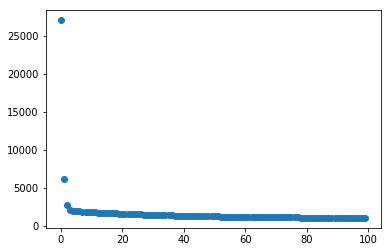

In [31]:
plt.plot(loss_values, 'o')

#### Plot Convergence

We can visualize the convergernce of the regression line with the following code (that I just copied and do not feel the need to try to interpret because it does weird colour magic)

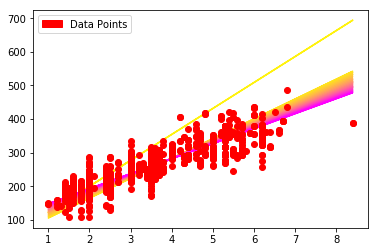

In [32]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))


green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line]) 
plt.plot(train_x, train_y, 'ro')

### Lab - Logistic Regression

Logistic Regression is a classification technique which is used to identfy what class a specific datapoint belongs to. Logistic regression is a probabilistic classification model which fits a special s-shaped curve by taking the linear regression ad converting it to a probability with the following function (sigmoid)

$$
P = P(y) = \frac{1}{1+e^{-y}}
$$

#### Import Libraries

In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#### Iris Dataset

The Iris dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/iris)

In [34]:
iris = load_iris()
iris_x, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.33, 
                                                random_state=42)

In [35]:
iris_x[0::20]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5. ,  3.5,  1.3,  0.3],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 5.5,  2.4,  3.8,  1.1],
       [ 6.3,  3.3,  6. ,  2.5],
       [ 6.9,  3.2,  5.7,  2.3],
       [ 6.7,  3.1,  5.6,  2.4]])

In [36]:
iris_y[0::20]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

#### Placeholders

Placeholders can be used to hold the Iris data for the feature and label matrices in order to define the algorithm, placeholders allw us to change the data being used without modifying the algorithm

In [37]:
num_features = train_x.shape[1]
num_labels = train_y.shape[1]

print(num_features, num_labels)

4 3


The Iris Dataset gives us 4 predictor variables and a label that can be one of 3 options (being labelled from 0-2) which are converted to dummies with 3 columns

We can use `tf.placeholder()` to set the placeholders, the `None` below indicates that TF should not expect a fixed number in that dimension

In [38]:
x = tf.placeholder(tf.float32, [None, num_features])
y_target = tf.placeholder(tf.float32, [None, num_labels])

print(x, y_target)

Tensor("Placeholder_1:0", shape=(?, 4), dtype=float32) Tensor("Placeholder_2:0", shape=(?, 3), dtype=float32)


### Weights and Biases

A Logistic Regression Model will work to optimize the weights and biases that we use, these values will then be optimized by the model. For our default values we can use random tensors to start with - these values will be optimized

Weights will have the shape of \[input dimension, output dimension\] and Biases will have the shape of \[output dimension\]

If we were to use Zero Tensors instead of random, the tensors would be as follows:

```python
weights = tf.Variable(tf.zeros([num_features, num_labels]))
biases = tf.Variable(tf.zeros([1, num_labels]))
```

We will define our weights and biases as TF variables as below

In [39]:
weights_var = tf.Variable(tf.random_normal([num_features, num_labels],
                                       mean=0,
                                       stddev=0.01,
                                       name='weights'))

biases_var = tf.Variable(tf.random_normal([1, num_labels],
                                       mean=0,
                                       stddev=0.01,
                                       name='bias'))

print(weights_var, biases_var)

<tf.Variable 'Variable_3:0' shape=(4, 3) dtype=float32_ref> <tf.Variable 'Variable_4:0' shape=(1, 3) dtype=float32_ref>


#### Logistic Regression Model

The LRM is represented by the following equation

$$
\hat y=\sigma (Wx+b)
$$

Which can be seen to be broken into the following steps

- Multiply by weights
- Add bias
- Apply sigmoid

This can be applied in three separate steps which each make use of the previous as:

```python
apply_weights_op = tf.matmul(X, weights, name="apply_weights")
add_bias_op = tf.add(apply_weights_op, bias, name="add_bias") 
activation_op = tf.nn.sigmoid(add_bias_op, name="activation")
```

Note that `tf.matmul` is not the same as `tf.multiply` which does element-wise multiplication as opposed to matrix multiplication

```python
tf.multiply(a, b) == a*b != tf.matmul(a, b)
```

Making use of the above information, the operation can be done in a single step as follows

In [40]:
lr_op = tf.nn.sigmoid(tf.matmul(x, weights_var) + biases_var, 
                      name='lr_operation')
lr_op

<tf.Tensor 'lr_operation:0' shape=(?, 3) dtype=float32>

#### Training

Training is the process of identifying the optimal Weight and Bias vectors, based on this we need a method o identify our cost. In order to do this we can make use of the cost functions available in TF

In [41]:
num_cycles = 1000

learning_rate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step=1,
                                          decay_steps=train_x.shape[0],
                                          decay_rate=0.95,
                                          staircase=True)

cost_op = tf.nn.l2_loss(lr_op - y_target, name='sqe_cost')

training_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_op)

In [42]:
sess = tf.Session()

> Ensure that you run the initialization operation `sess.run(init_op)`

In [43]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

We want to be able to also keep track of some summary statistics for the model over time while we train it, this can be done with:

In [44]:
correct_predictions_op = tf.equal(tf.argmax(lr_op, 1), tf.argmax(y_target, 1))

accuracy_op = tf.reduce_mean(tf.cast(correct_predictions_op, 'float'))

activation_summary_op = tf.summary.histogram('output', lr_op)

accuracy_summary_op = tf.summary.histogram('accuracy', accuracy_op)

cost_summary_op = tf.summary.scalar('cost', cost_op)

weight_summary_op = tf.summary.histogram('weights', weights_var.eval(session=sess))
bias_summary_op = tf.summary.histogram('biases', biases_var.eval(session=sess))

merged = tf.summary.merge([activation_summary_op,
                          accuracy_summary_op,
                          cost_summary_op,
                          weight_summary_op,
                          bias_summary_op])

writer = tf.summary.FileWriter('sumary_logs', sess.graph)

#### Initialize Reporting Variables

In [45]:
cost = 0
diff = 1
diff_values = []
cycle_values = []
accuracy_values = []
cost_values = []

#### Train Model

In [46]:
for i in range(num_cycles):
    # check if we have convergence
    if diff < 0.001:
        print('change in cost:', diff)
        break
    else:
        # run a training step
        step = sess.run(training_op, feed_dict={x: train_x, y_target: train_y})
        # report stats
        if i % 30 == 0:
            cycle_values.append(i)
            train_accuracy = sess.run(accuracy_op,
                                      feed_dict={x: train_x, y_target: train_y})
            new_cost = sess.run(cost_op,
                                feed_dict={x: train_x, y_target: train_y})
            
            accuracy_values.append(train_accuracy)
            cost_values.append(new_cost)
            diff = abs (new_cost - cost)
            diff_values.append(diff)
            cost = new_cost
        
            print('step', i, 
                  'training accuracy', train_accuracy,
                  'new cost', new_cost,
                  'change in cost', diff)

step 0 training accuracy 0.333333 new cost 34.7705 change in cost 34.7705154419
step 30 training accuracy 0.646465 new cost 26.6535 change in cost 8.11701
step 60 training accuracy 0.646465 new cost 23.186 change in cost 3.46755
step 90 training accuracy 0.646465 new cost 21.1744 change in cost 2.0116
step 120 training accuracy 0.666667 new cost 19.9113 change in cost 1.26302
step 150 training accuracy 0.666667 new cost 19.0487 change in cost 0.862673
step 180 training accuracy 0.686869 new cost 18.4168 change in cost 0.631851
step 210 training accuracy 0.737374 new cost 17.9279 change in cost 0.488934
step 240 training accuracy 0.757576 new cost 17.533 change in cost 0.394899
step 270 training accuracy 0.787879 new cost 17.2032 change in cost 0.329775
step 300 training accuracy 0.79798 new cost 16.9205 change in cost 0.282696
step 330 training accuracy 0.79798 new cost 16.6731 change in cost 0.2474
step 360 training accuracy 0.828283 new cost 16.453 change in cost 0.220098
step 390 tr

In [47]:
print("final accuracy on test set: %s" %str(sess.run(accuracy_op, 
                                                     feed_dict={x: test_x, 
                                                                y_target: test_y})))

final accuracy on test set: 1.0


#### Close Session

In [48]:
sess.close()

#### Accuracy and Cost

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


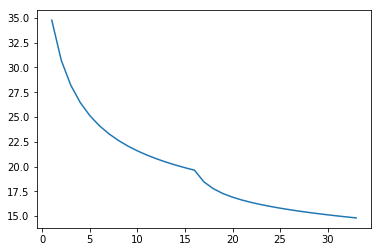

In [49]:
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


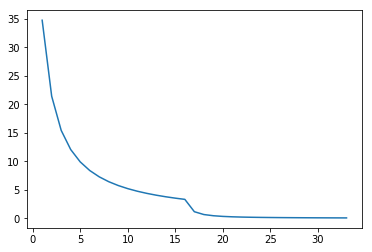

In [50]:
plt.plot([np.mean(diff_values[i-50:i]) for i in range(len(diff_values))])
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


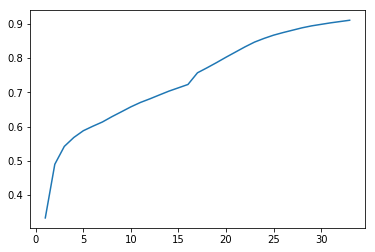

In [51]:
plt.plot([np.mean(accuracy_values[i-50:i]) for i in range(len(accuracy_values))])
plt.show()

### Lab - Activation Functions

Activation functions are an important part of ML. In general these define how a node will process it's input. Some of the commonly used activation functions are

- Step Functions
- Sigmoid Functions
- Linear Unit Functions

#### Import Libraries

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#### Define a Plot Function

In [53]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)

    X, Y = np.meshgrid(ws, bs)

    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])

    Z = os.reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

#### Basic Structure

The basic structure of using an activation function in TF follows the procedure:

1. Define the Activation Function
2. Start a session
3. Define the input
4. Define the weights
5. Define the biases
6. Create an opperation to apply the activation function
7. Evaluate activation

... Do any other necessary stuff

8. Close the Session

In [54]:
def dummy_activation(x): return x

In [55]:
sess = tf.Session()

In [56]:
i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])
w = tf.random_normal(shape=[3, 3])
b = tf.random_normal(shape=[1, 3])

act = dummy_activation(tf.matmul(i, w) + b)

act.eval(session=sess)

array([[-5.03920984,  1.89910245,  0.87091309]], dtype=float32)

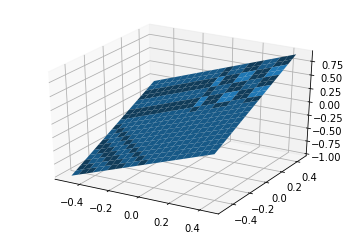

In [57]:
plot_act(1.0, dummy_activation)

#### Step Function

The step function is pretty much your normla step function - TF does not have a step function

#### Sigmoid

Sigmoid functions are defined by

$$
\sigma (x)=\frac{1}{1+e^{-x}}
$$

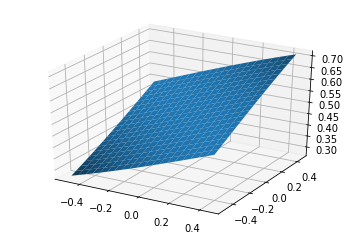

In [58]:
plot_act(1, tf.sigmoid)

#### Sigmoid in a Nueral Net Layer

In [59]:
act = tf.sigmoid(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[ 0.87340444,  0.96376246,  0.03358302]], dtype=float32)

#### Arctan and Tanh

Arctan and Tanh produce sigmoids over the interval of $(\frac{-\pi}{2},\frac{\pi}{2})$ and $(-1, 1)$ respectively

$$
f(x) = tan^{-1}x
$$

$$
f(x) = \frac{2}{1+e^{-2x}}-1
$$

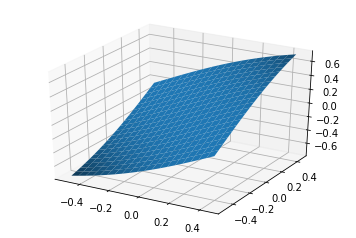

In [60]:
plot_act(1, tf.tanh)

In [61]:
act = tf.tanh(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[-0.76303244,  0.94664925,  0.99869919]], dtype=float32)

#### Linear Unit Functions

LU's behave with the best features from the Sigmoid and the Step functio  and tend to be a variation of a Rectified Linear Unit (ReLU)

ReLU is function that operates within the $[0,\infty)$ region and returns $f(x)=0$ for any negative input and $f(x)=x$ for any positive input

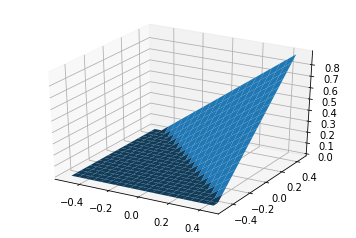

In [62]:
plot_act(1, tf.nn.relu)

In [63]:
act = tf.nn.relu(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[ 0.,  0.,  0.]], dtype=float32)

In [64]:
sess.close()